<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
# read the data
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
print('Number of Rows:', len(movies.axes[0]))
print('Number of Columns:', len(movies.axes[1]))

Number of Rows: 979
Number of Columns: 6


#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

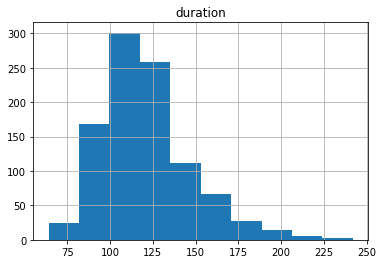

In [7]:
# Answer:
movies.hist('duration', bins=10)

#### Use a box plot to display that same data.

<AxesSubplot:>

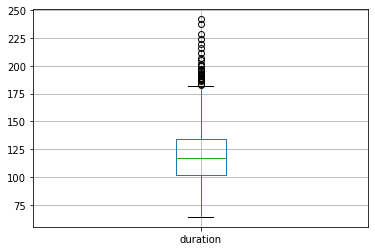

In [8]:
# Answer:
movies.boxplot('duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Number of Movies per Content Rating')

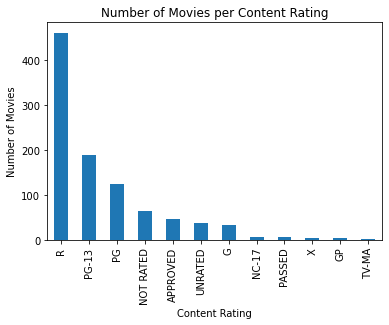

In [10]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Content Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
movies['content_rating'].replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED', 'PASSED':'UNRATED', 'GP':'UNRATED'}, inplace=True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
movies['content_rating'].replace({'X':'NC-17', 'TV-MA':'NC-17'}, inplace=True)

In [13]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
# Answer:
movies.content_rating.fillna('UNRATED', inplace=True)

In [17]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [18]:
# transform the unit of duration from minutes to hours
movies['hours'] = round(movies.duration/60, 2)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,hours
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",2.37
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",2.92
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",3.33
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",2.53
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",2.57


In [19]:
# Answer:
# find movies more than or equal to 2 hours
movies_long = movies[movies.hours >= 2]
# find average long movies
avg_long = movies_long.star_rating.mean()

# find movies shorter than 2 hours
movies_short = movies[movies.hours < 2]
# find average
avg_short = movies_short.star_rating.mean()

# print the average
print('Average star rating for movies 2 hours or longer:', round(avg_long, 1))
print('Average star rating for movies shorter than 2 hours:', round(avg_short, 1))

Average star rating for movies 2 hours or longer: 7.9
Average star rating for movies shorter than 2 hours: 7.8


#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

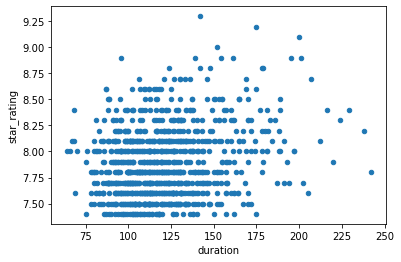

In [20]:
# Answer:
movies.plot(kind='scatter', x='duration', y='star_rating')

#### Calculate the average duration for each genre.

In [21]:
genre_list = movies.genre.unique().tolist()

In [22]:
# Answer:
for l in genre_list:
    movies_genre = movies[movies.genre == l]
    average = movies_genre.duration.mean()
    print('Average duration for {} genre: {} minutes'.format(l, round(average, 2)))

Average duration for Crime genre: 122.3 minutes
Average duration for Action genre: 126.49 minutes
Average duration for Drama genre: 126.54 minutes
Average duration for Western genre: 136.67 minutes
Average duration for Adventure genre: 134.84 minutes
Average duration for Biography genre: 131.84 minutes
Average duration for Comedy genre: 107.6 minutes
Average duration for Animation genre: 96.6 minutes
Average duration for Mystery genre: 115.62 minutes
Average duration for Horror genre: 102.52 minutes
Average duration for Film-Noir genre: 97.33 minutes
Average duration for Sci-Fi genre: 109.0 minutes
Average duration for History genre: 66.0 minutes
Average duration for Thriller genre: 114.2 minutes
Average duration for Family genre: 107.5 minutes
Average duration for Fantasy genre: 112.0 minutes


## Advanced level

#### Visualize the relationship between content rating and duration.

<AxesSubplot:title={'center':'duration'}, xlabel='content_rating'>

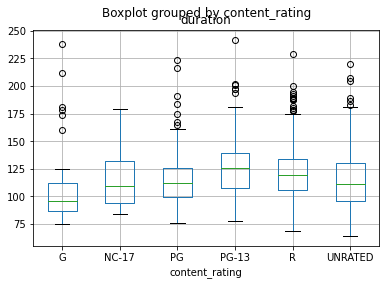

In [23]:
# Answer:
movies.boxplot(column='duration', by='content_rating')

#### Determine the top rated movie (by star rating) for each genre.

In [24]:
# Answer:
for lst in genre_list:
    movies_genre = movies[movies.genre == lst].sort_values('star_rating', ascending=False).iloc[:1]
    print(lst)
    print(movies_genre.title)
    print('\n')

Crime
0    The Shawshank Redemption
Name: title, dtype: object


Action
3    The Dark Knight
Name: title, dtype: object


Drama
5    12 Angry Men
Name: title, dtype: object


Western
6    The Good, the Bad and the Ugly
Name: title, dtype: object


Adventure
7    The Lord of the Rings: The Return of the King
Name: title, dtype: object


Biography
8    Schindler's List
Name: title, dtype: object


Comedy
25    Life Is Beautiful
Name: title, dtype: object


Animation
30    Spirited Away
Name: title, dtype: object


Mystery
38    Rear Window
Name: title, dtype: object


Horror
39    Psycho
Name: title, dtype: object


Film-Noir
105    The Third Man
Name: title, dtype: object


Sci-Fi
145    Blade Runner
Name: title, dtype: object


History
338    Battleship Potemkin
Name: title, dtype: object


Thriller
350    Shadow of a Doubt
Name: title, dtype: object


Family
468    E.T. the Extra-Terrestrial
Name: title, dtype: object


Fantasy
638    The City of Lost Children
Name: title, dtype: obje

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [25]:
# Answer:
dup = movies[movies['title'].duplicated(keep=False)]
dup

,star_rating,title,content_rating,genre,duration,actors_list,hours
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",2.63
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",2.53
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",1.83
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",2.63
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",1.42
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",2.13
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",2.23
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",2.13


In [26]:
dup.duplicated().values.any()

False

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [27]:
# Answer:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [28]:
list_genre = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
for l in list_genre:
    movies_genre = movies[movies.genre == l]
    average = movies_genre.star_rating.mean()
    print('{} : {}'.format(l, round(average, 2)))

Drama : 7.9
Comedy : 7.82
Action : 7.88
Crime : 7.92
Biography : 7.86
Adventure : 7.93
Animation : 7.91
Horror : 7.81
Mystery : 7.97


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [29]:
# Answer:
average = movies.groupby('genre').filter(lambda x: len(x) > 10)
average.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [30]:
# Answer:


#### Option 4: aggregate by count and mean, then filter using the count

In [31]:
# Answer:
movies.groupby('genre').star_rating.agg(['count', 'mean']).sort_values('count', ascending=False)

,count,mean
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!